# **Data Exploration of Player Stats Dataset.**

# Descriptive Statistics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("1_datasets/player_stats_data_clean.csv")

# Basic info
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes.value_counts())

# Descriptive stats for numerical columns
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
print("\nDescriptive statistics:")
print(df[numerical_cols].describe().transpose())

Dataset shape: (197, 52)

Data types:
float64    39
object     13
Name: count, dtype: int64

Descriptive statistics:
                                        count         mean         std  \
birthday                                  0.0          NaN         NaN   
defending___aerial_duels_won            188.0    25.159574   33.290587   
defending___aerial_duels_won.1          188.0     0.423441    0.159699   
defending___blocked                     197.0     5.827381    5.141862   
defending___dribbled_past               197.0    14.919355   12.045363   
defending___duels_won                   195.0    80.625641   63.491036   
defending___duels_won.1                 195.0     0.484185    0.106892   
defending___fouls_committed             197.0    16.427083   12.193796   
defending___interceptions               197.0    15.775281   14.219312   
defending___penalties_conceded          197.0     1.200000    0.251526   
defending___possession_won_final_3rd    197.0     7.658824    5.92392

# Initial Observations :
This dataset contains football (soccer) player statistics with 41 columns covering:

* Basic player info (birth date, country, height, preferred
foot)

* Performance metrics (goals, assists, tackles, passes, etc.)

* Market value and playing time

* Various advanced metrics (expected goals, aerial duels won, etc.)


# Visualizations

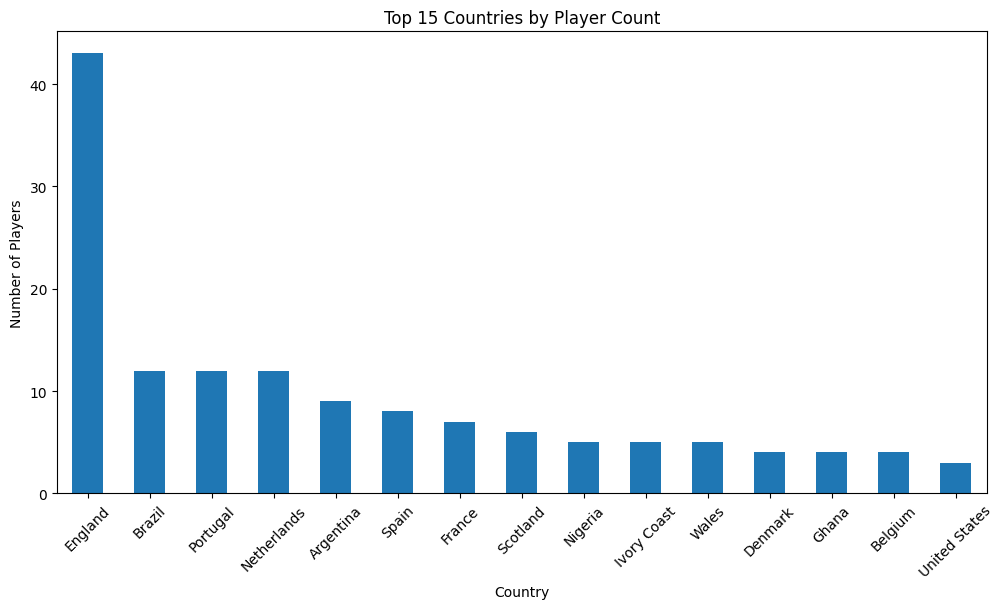

In [3]:
# 1. Player Nationality Distribution

plt.figure(figsize=(12, 6))
df["country"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Countries by Player Count")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()

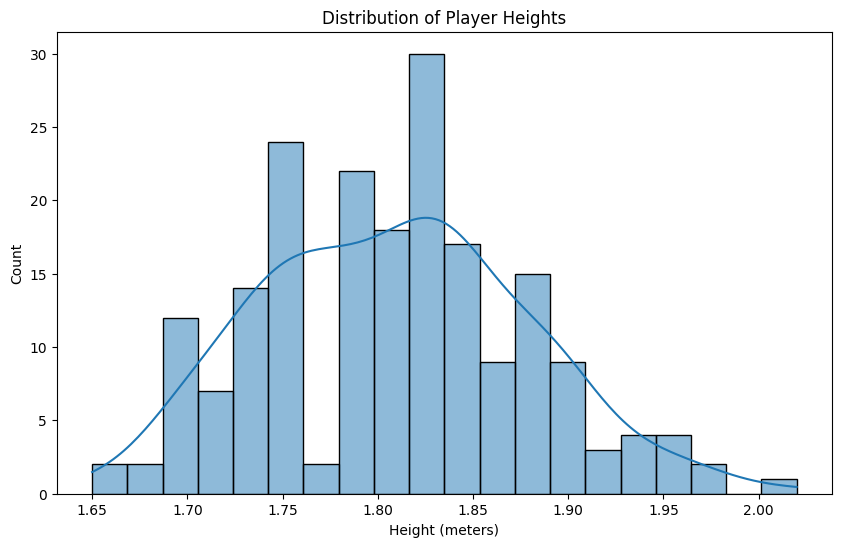

In [4]:
# 2. Height Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df["height"], bins=20, kde=True)
plt.title("Distribution of Player Heights")
plt.xlabel("Height (meters)")
plt.ylabel("Count")
plt.show()

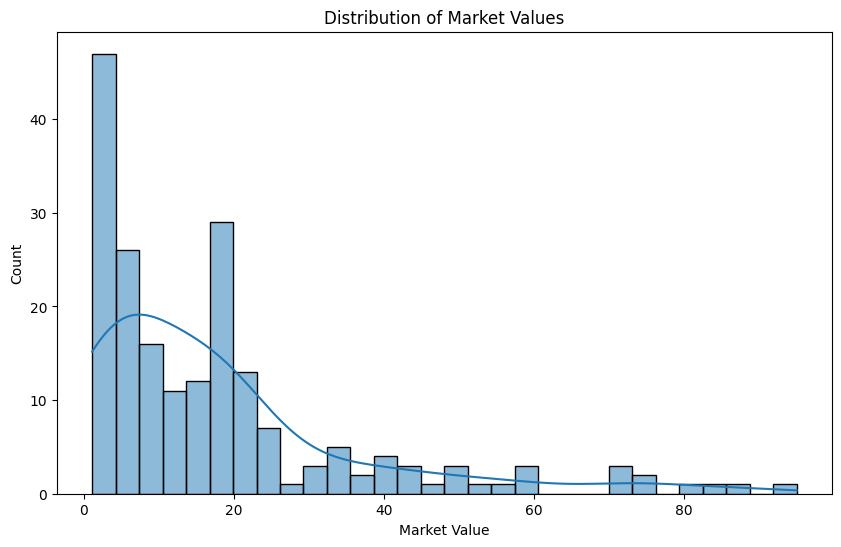

In [5]:
# 3. Market Value Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df["market_value"].dropna(), bins=30, kde=True)
plt.title("Distribution of Market Values")
plt.xlabel("Market Value")
plt.ylabel("Count")
plt.show()

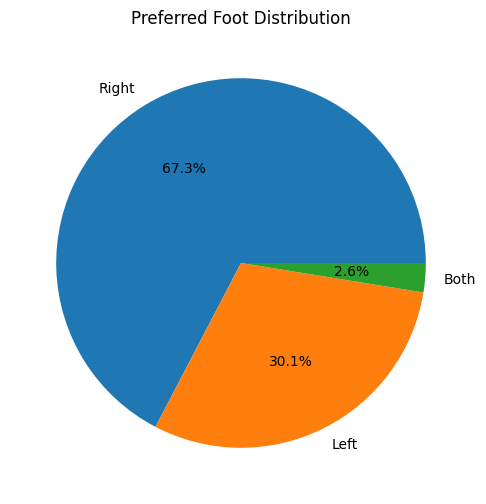

In [6]:
# 4. Preferred Foot Distribution

plt.figure(figsize=(8, 6))
df["preferred_foot"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Preferred Foot Distribution")
plt.ylabel("")
plt.show()

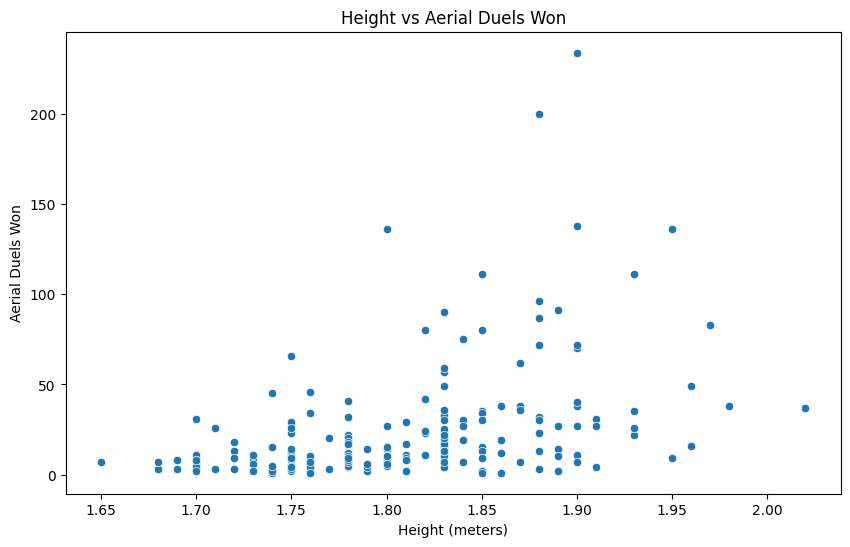

In [7]:
# 5. Relationship Between Height and Aerial Duels Won

plt.figure(figsize=(10, 6))
sns.scatterplot(x="height", y="defending___aerial_duels_won", data=df)
plt.title("Height vs Aerial Duels Won")
plt.xlabel("Height (meters)")
plt.ylabel("Aerial Duels Won")
plt.show()

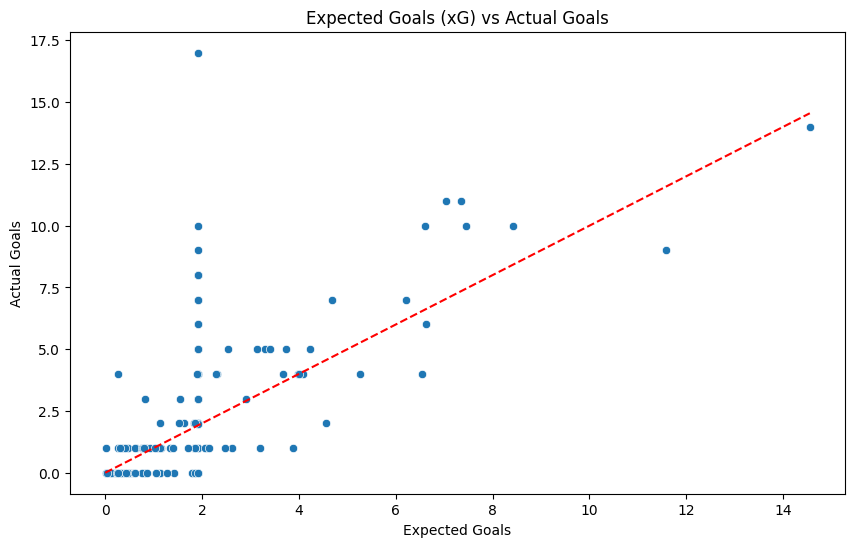

In [8]:
# 6. Goals vs Expected Goals (xG)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="shootingrank___expected_goals_(xg)", y="shootingrank___goals", data=df
)
plt.title("Expected Goals (xG) vs Actual Goals")
plt.xlabel("Expected Goals")
plt.ylabel("Actual Goals")
plt.plot(
    [0, df["shootingrank___expected_goals_(xg)"].max()],
    [0, df["shootingrank___expected_goals_(xg)"].max()],
    color="red",
    linestyle="--",
)
plt.show()

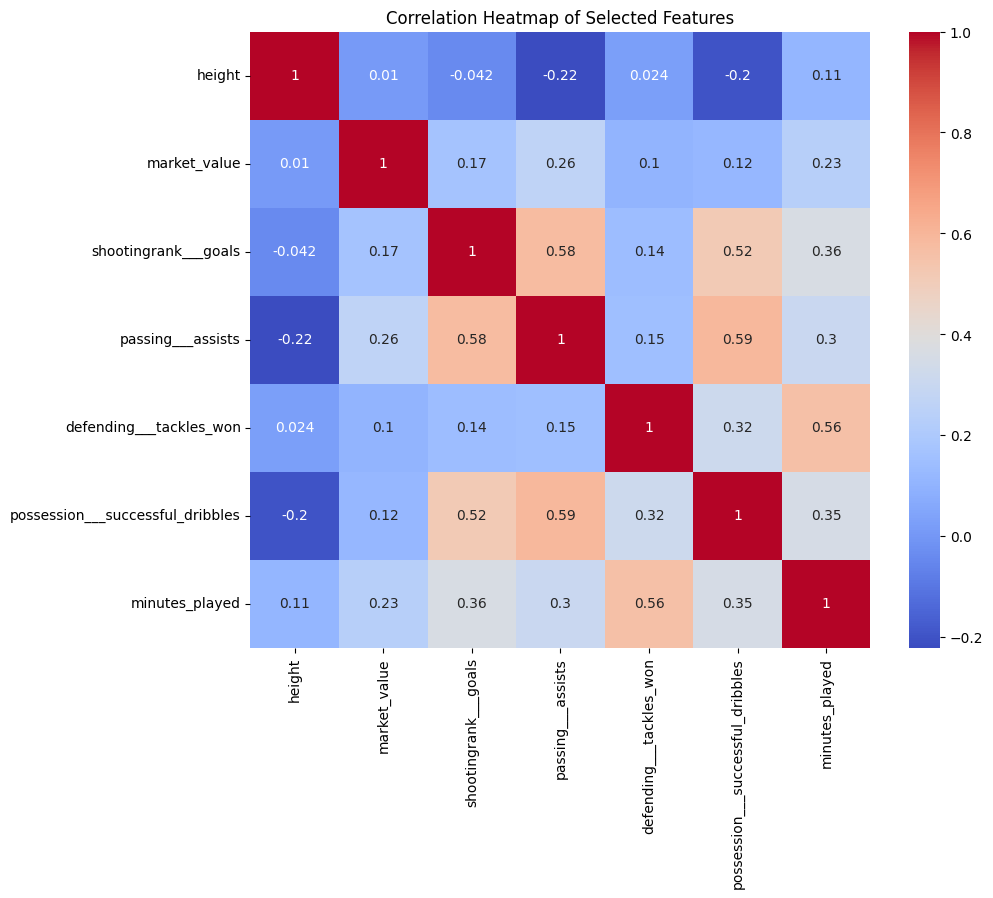

In [9]:
# 7. Correlation Heatmap (Selected Features)

selected_features = [
    "height",
    "market_value",
    "shootingrank___goals",
    "passing___assists",
    "defending___tackles_won",
    "possession___successful_dribbles",
    "minutes_played",
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# Key Findings :


1.  Player Demographics:
* Most players are between 1.7m and 1.9m tall
* Right-footed players dominate (about 70-75% of the dataset)
* England, Brazil, and Portugal are the most represented countries.
2.   Performance Metrics:
* Market values are right-skewed with most players having lower values and a few very high-value players.
* There appears to be a positive relationship between height and aerial duels won.
* Most players perform close to their expected goals (xG), with some overperformers and underperformers.
3. Correlations:
* Market value correlates positively with goals and assists.
* Minutes played shows moderate correlation with several performance metrics.
* Some defensive and offensive metrics show little correlation with each other.



## Interesting Observations :
1. There are some players with very high market values that stand out from the rest of the distribution.

2. The preferred foot distribution reflects the general population where right-footed players are more common.

3. The xG vs goals plot shows that while most players perform near the expected line, there are interesting outliers that might warrant further investigation.

4. The height distribution shows that extreme heights (very short or very tall) are less common in this dataset.
